<a href="https://colab.research.google.com/github/shofydidntsleep/AIML-Hub/blob/main/Automating%20Dataset%20Retrieval%20and%20Analysis%20Using%20KaggleHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset dan Library**

In [ ]:
# Import untuk akses dataset dan manipulasi file
import os
import kagglehub

# Import untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Import untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import untuk preprocessing data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Import untuk penyeimbangan data
from imblearn.over_sampling import RandomOverSampler

# Import untuk pengembangan model (Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Import untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Download latest version
path = kagglehub.dataset_download("kk0105/allflowmeter-hikari2021")

print("Path to dataset files:", path)

100%|██████████| 73.6M/73.6M [00:01<00:00, 62.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kk0105/allflowmeter-hikari2021/versions/1


In [ ]:
dataset_path = '/root/.cache/kagglehub/datasets/kk0105/allflowmeter-hikari2021/versions/1'
files = os.listdir(dataset_path)

print("File yang ada di dalam folder dataset:")
print(files)

File yang ada di dalam folder dataset:
['ALLFLOWMETER_HIKARI2021.csv']


In [ ]:
# Ganti nama file sesuai dengan yang ada di folder
csv_file_path = os.path.join(dataset_path, 'ALLFLOWMETER_HIKARI2021.csv')

# Membaca file CSV
data = pd.read_csv(csv_file_path)
print("Data berhasil dimuat!")
print(data.head())

Data berhasil dimuat!
   Unnamed: 0.1  Unnamed: 0                 uid        originh  originp  \
0             0           0   Cg61Jch3vdz9DBptj  103.255.15.23    13316   
1             1           1   CdRIlqLWdj35Y9vW9  103.255.15.23    13318   
2             2           2   CLzp9Khd0Y09Qkgrg  103.255.15.23    13320   
3             3           3  Cnf1YA4iLB4CSNWB88  103.255.15.23    13322   
4             4           4  C4ZKvv3fpO72EAOsJ6  103.255.15.23    13324   

           responh  responp  flow_duration  fwd_pkts_tot  bwd_pkts_tot  ...  \
0  128.199.242.104      443       2.207588            15            14  ...   
1  128.199.242.104      443      15.624266            15            14  ...   
2  128.199.242.104      443      12.203357            14            13  ...   
3  128.199.242.104      443       9.992448            14            13  ...   
4  128.199.242.104      443       7.780611            14            14  ...   

       idle.min      idle.max      idle.tot      idl

# **Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

In [ ]:
#Pengecekan ukuran data
data.shape

(555278, 88)

# **Data Preprocessing**

In [ ]:
#Penghapusan fitur yang tidak diperlukan dalam klasifikasi
drop_cols = ['Unnamed: 0.1','Unnamed: 0','uid','originh','responh','Label']
data.drop(columns=drop_cols, inplace=True)

traffic_category
Benign                 347431
Background             170151
Probing                 23388
Bruteforce               5884
Bruteforce-XML           5145
XMRIGCC CryptoMiner      3279
Name: count, dtype: int64


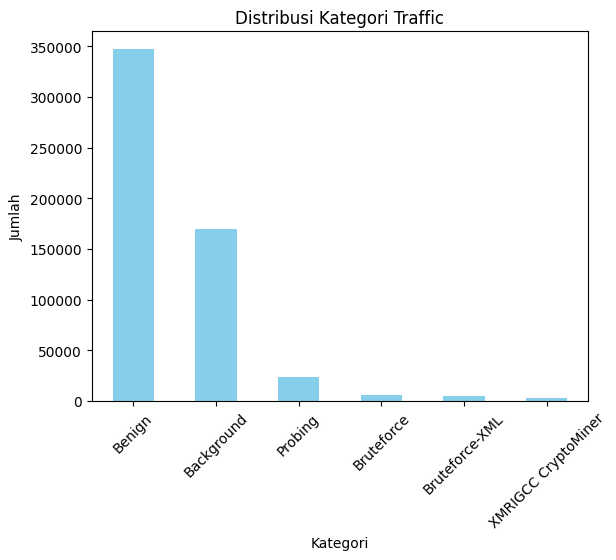

In [ ]:
#Distribusi kategori data
category_distribution = data['traffic_category'].value_counts()
print(category_distribution)
# Visualisasi distribusi kategori
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Kategori Traffic')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Pemisahan fitur dan label
X = data.drop('traffic_category', axis=1)
y = data['traffic_category']

In [ ]:
#Penggunaan Random Oversample untuk balancing data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


traffic_category
Bruteforce-XML         347431
Bruteforce             347431
Background             347431
Benign                 347431
Probing                347431
XMRIGCC CryptoMiner    347431
Name: count, dtype: int64


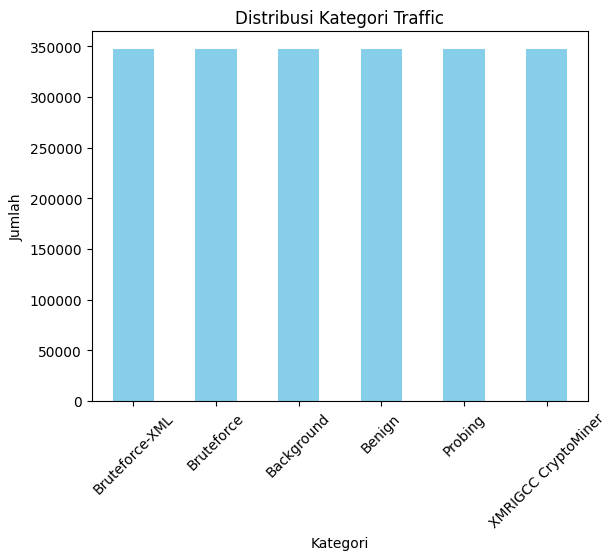

In [ ]:
#Distribusi kategori data
category_distribution = y_resampled.value_counts()
print(category_distribution)
# Visualisasi distribusi kategori
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Kategori Traffic')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Pembagian data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [ ]:
#Penggunaan Standard Scaler untuk normalisasi data

# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan scaling hanya pada data latih
X_train_scaled = scaler.fit_transform(X_train)

# Gunakan scaler yang sama untuk data uji
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Mengubah label yang awalnya berupa kategori menjadi label numerik 0 - 5 menggunakan LabelEncoder
# Inisialisasi encoder
label_encoder = LabelEncoder()

# Encode label string menjadi integer
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Konversi label integer ke one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

In [ ]:
# Mapping label string ke integer
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping label:", label_mapping)

Mapping label: {'Background': 0, 'Benign': 1, 'Bruteforce': 2, 'Bruteforce-XML': 3, 'Probing': 4, 'XMRIGCC CryptoMiner': 5}


# **Model Development**

In [ ]:
#Pembuatan model MLP untuk klasifikasi
model = Sequential()

# Input layer (jumlah fitur = X_train_scaled.shape[1])
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layer 1
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout untuk menghindari overfitting

# Hidden layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer (jumlah kelas = y_train_onehot.shape[1])
model.add(Dense(y_train_onehot.shape[1], activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,030 (82.15 KB)

 Trainable params: 21,030 (82.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Latih model
history = model.fit(
    X_train_scaled,
    y_train_onehot,
    validation_data=(X_test_scaled, y_test_onehot),
    epochs=20,  # Sesuaikan dengan kebutuhan
    batch_size=128,
    verbose=1
)

Epoch 1/20
13029/13029 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.8983 - loss: 0.2582 - val_accuracy: 0.9010 - val_loss: 0.2533
Epoch 2/20
13029/13029 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.8976 - loss: 0.2595 - val_accuracy: 0.9012 - val_loss: 0.2525
Epoch 3/20
13029/13029 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.8992 - loss: 0.2572 - val_accuracy: 0.9003 - val_loss: 0.2521
Epoch 4/20
13029/13029 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.8988 - loss: 0.2574 - val_accuracy: 0.9006 - val_loss: 0.2522
Epoch 5/20
13029/13029 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8993 - loss: 0.2572 - val_accuracy: 0.9020 - val_loss: 0.2512
Epoch 6/20
13029/13029 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.8993 - loss: 0.2583 - val_accuracy: 0.9025 - val_loss: 0.2498
Epoch 7/20
13029/13029 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.8996 - loss: 0.2566 - val_accuracy: 0.9018 - val_loss: 0.2498
Epoch 8/20
13029/13029 ━━━━━━━━━━━━━━━━━━━━ 90s 4ms/step - accuracy: 

# **Evaluation**

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test_scaled, y_test_onehot)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


13029/13029 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9028 - loss: 0.2503
Loss: 0.24909663200378418
Accuracy: 0.9029617309570312


In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Kelas hasil prediksi
y_true_classes = np.argmax(y_test_onehot, axis=1)  # Kelas sebenarnya

# Classification report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

13029/13029 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82     69486
           1       0.82      0.56      0.66     69486
           2       0.98      1.00      0.99     69486
           3       0.99      1.00      0.99     69487
           4       0.85      1.00      0.92     69487
           5       0.98      1.00      0.99     69486

    accuracy                           0.90    416918
   macro avg       0.90      0.90      0.90    416918
weighted avg       0.90      0.90      0.90    416918



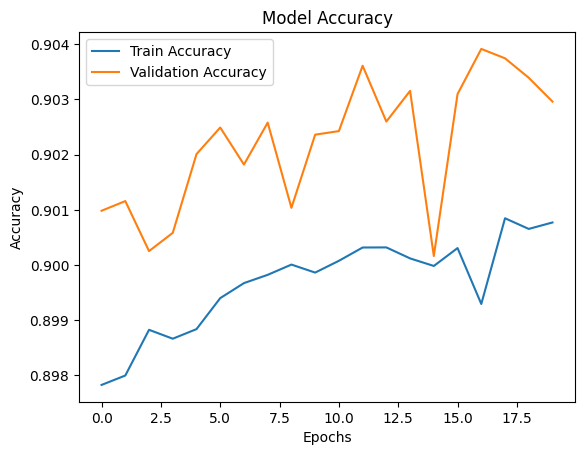

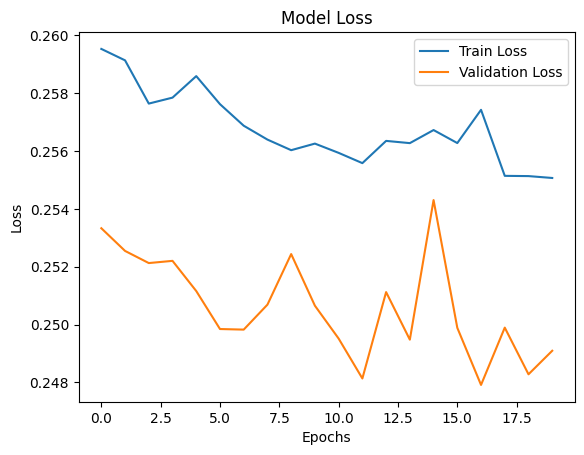

In [ ]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

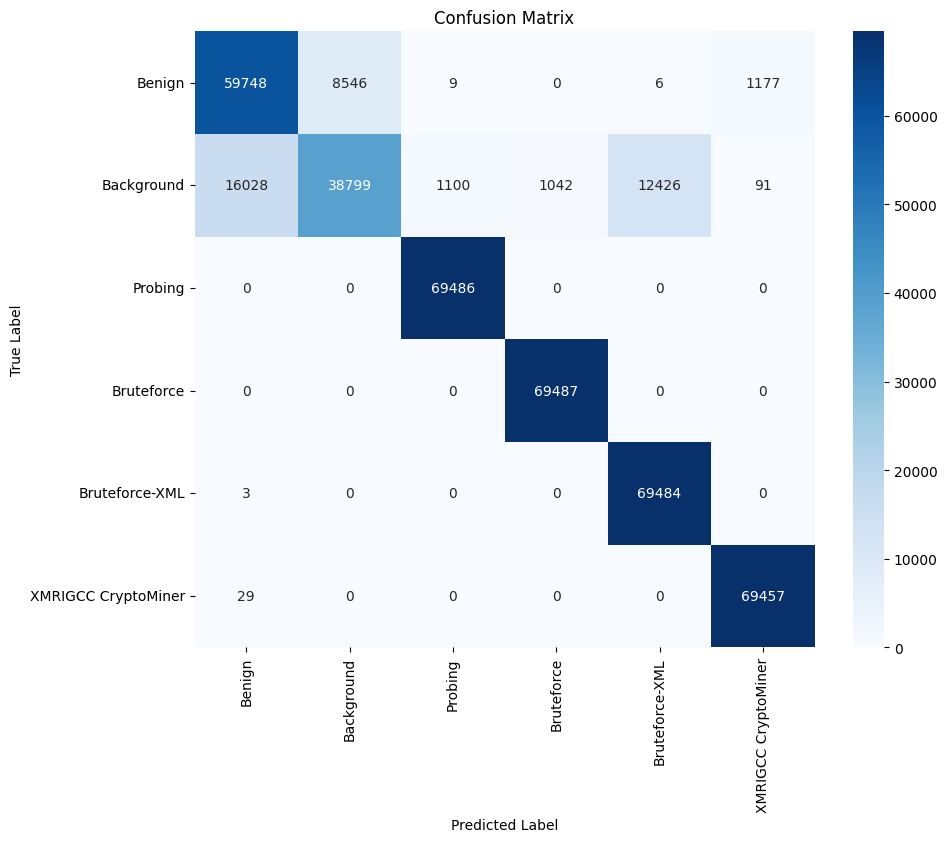

In [ ]:
class_names = ['Benign', 'Background', 'Probing', 'Bruteforce', 'Bruteforce-XML', 'XMRIGCC CryptoMiner']

# Hitung confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Membuat plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
